<div class='alert alert-success'>
    <h1 align="center">Advanced Optimization Methods</h1> 
    <h3 align="center"> Machine Learning Course (Fall 2018)</h3>
    <h5 align="center">Seyed Naser Razavi [ML2018](http://www.snrazavi.ir/ml-2018/)</h5>
</div>

## Advanced Optimization methods

- No need for learning rate hyper-parameter ($\alpha$).
- Usually converge much faster than gradient descent.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.optimize import minimize  # for optimization

### Cost function
The cost function is the function which we need to minimize.

In [2]:
def J(theta):
    return (theta[0] - 5) ** 2 + (theta[1] - 5) ** 2

#### Plot cost function

In [3]:
t0 = np.linspace(0, 10, 100)
t1 = np.linspace(0, 10, 100)

T0, T1 = np.meshgrid(t0, t1)
Z = (T0 - 5) ** 2 + (T1 - 5) ** 2

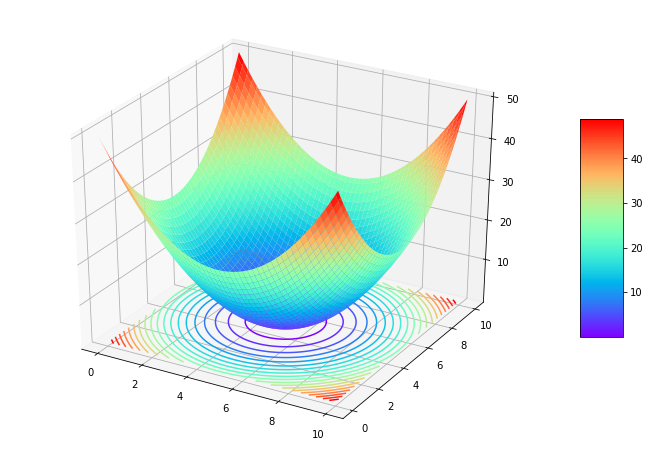

In [4]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T0, T1, Z, cmap=plt.cm.rainbow)
cset = ax.contour(T0, T1, Z, 20, zdir='z', offset=0, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

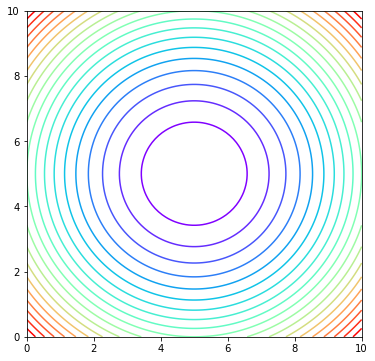

In [5]:
plt.figure(figsize=(6, 6))
cset = plt.contour(T0, T1, Z, 20, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

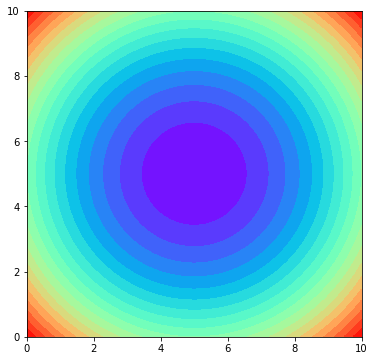

In [6]:
plt.figure(figsize=(6, 6))
cset = plt.contourf(T0, T1, Z, 20, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Using `scipy.optimize.minimize`

After defining the cost function, we can use the `minimize` function from `scipy.optimize` to minimize the cost function.

To use the `minimize` function, we need to provide the following three arguments:
1. The first argument is the cost function itself.
2. The second argument is our initial guess.
3. The optimization method (`CG`, `BFGS`, ...)

In [7]:
minimize(J, x0=[0, 0], method='CG')

     fun: 2.477476329894505e-18
     jac: array([1.71271335e-08, 1.71271335e-08])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([5., 5.])

Another initial guess:

In [8]:
minimize(J, x0=[10, -3], method='CG')

     fun: 2.730455135196181e-16
     jac: array([ 1.12131602e-08, -1.79405912e-08])
 message: 'Optimization terminated successfully.'
    nfev: 48
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([5.        , 4.99999998])

Random initial guess:

In [9]:
minimize(J, x0=np.random.randn(2), method='CG')

     fun: 6.466760376489385e-16
     jac: array([-2.04762269e-08, -2.16384688e-08])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 3
    njev: 7
  status: 0
 success: True
       x: array([4.99999998, 4.99999998])

Saving the outputs of the `minimize` function:

In [10]:
result = minimize(J, x0=np.random.randn(2), method='CG')

In [11]:
result.success

True

In [12]:
result.x  # solution

array([4.99999998, 4.99999999])

In [13]:
result.fun  # the minimum value of the cost function

4.1560175270959006e-16

Using other optimization methods:

In [14]:
minimize(J, x0=[0, 0], method='BFGS')

      fun: 3.5538794606501983e-16
 hess_inv: array([[ 0.75, -0.25],
       [-0.25,  0.75]])
      jac: array([-1.17592194e-08, -1.17592194e-08])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([4.99999999, 4.99999999])

Getting help:

In [ ]:
# ??minimize

### Providing gradient information

In [15]:
def gradients(theta):
    return np.array([2 * (theta[0] - 5), 2 * (theta[1] - 5)])

In [16]:
gradients([5, 5])

array([0, 0])

In [17]:
minimize(J, x0=np.random.randn(2), method='CG', jac=gradients)

     fun: 1.0960956191293664e-15
     jac: array([-4.14260004e-08, -5.16552898e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 3
    njev: 7
  status: 0
 success: True
       x: array([4.99999998, 4.99999997])